Explore a API do Keras e aprenda como utilizar os recursos explicados aqui: funções de ativação, inicialização de pesos, normalização por lote e dropout. Aplique em alguns modelos MLP para os conjuntos MNIST e Fashion MNIST. Não fique preso ao que foi mencionado na aula: pesquise sobre e utilize outras funções de ativação, inicializações, etc. O objetivo é que você ganhe familiaridade com a biblioteca e autonomia para navegar na API e implementar os recursos em seus modelos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from random import choices

# Digit Recognizer

## Importando Dataset

In [2]:
digits_PATH = '/kaggle/input/digit-recognizer/'

digits_train = pd.read_csv(digits_PATH+'train.csv')

In [3]:
X, y = digits_train.iloc[:,1:].values/255, digits_train.iloc[:,0].values

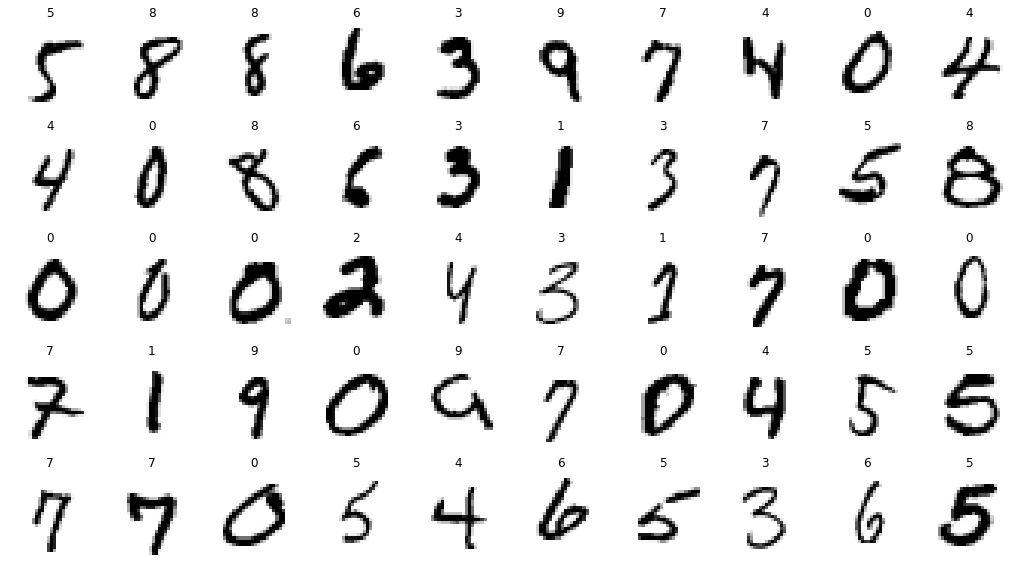

In [4]:
N_images = 50

# localização dos exemplos na matriz de dados 
rows = choices(range(0, 42000), k=N_images)

# selecionando os dígitos, já no formato de matriz
digitos = [X[i].reshape(28,28) for i in rows]
label_value = y[rows]

# criando figura do matplotlib
fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

# plotando!
for i in range(len(rows)):
    j = int(i/10)
    k = i - j*10
    ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
    ax[j, k].set_title(label_value[i])
    ax[j, k].axis('off')

### Funcões Auxiliares

In [5]:
def compare_confusion_matriz(modelo, X_treino, X_validacao, y_treino, y_validacao):
    
    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    confusao_val = confusion_matrix(y_validacao, y_validacao_pred)
    confusao_tr = confusion_matrix(y_treino, y_train_pred)
    
    fig, ax = plt.subplots(1, 2,figsize=(20,10))
    sns.heatmap(pd.DataFrame(confusao_val), ax=ax[0], cbar=False, annot=True)
    ax[0].set_title('Matriz de confusão validação', size=20)
    ax[0].set_yticklabels(ax[0].get_xticklabels(), rotation=0, size=15)
    ax[0].set_xticklabels(ax[0].get_yticklabels(), rotation=0, size=15)
    sns.heatmap(pd.DataFrame(confusao_tr), ax=ax[1], cbar=False, annot=True)
    ax[1].set_title('Matriz de confusão treino', size=20)
    ax[1].set_yticklabels(ax[1].get_xticklabels(), rotation=0, size=15)
    ax[1].set_xticklabels(ax[1].get_yticklabels(), rotation=0, size=15)
    plt.show()

In [6]:
def acuracia(modelo, X_treino, X_validacao, y_treino, y_validacao):

    y_validacao_pred = modelo.predict(X_validacao)
    y_train_pred = modelo.predict(X_treino)
    
    if isinstance(m, keras.models.Sequential):
        y_validacao_pred = np.argmax(y_validacao_pred, axis=1)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    
    acc_tr = accuracy_score(y_treino, y_train_pred)
    acc_val = accuracy_score(y_validacao, y_validacao_pred)

    return {'Acurácia do treino': acc_tr, 'Acurácia da validação': acc_val}

In [7]:
def plot_erros(model, X, target):

    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    
    predicao = pd.DataFrame(data={'predicao':y_pred, 'target':target})
    predicao_erros = predicao[predicao.predicao != predicao.target]
    
    N_images = 50

    # localização dos exemplos na matriz de dados 
    rows = predicao_erros.index[:N_images]

    # selecionando os dígitos, já no formato de matriz
    digitos = [X[i].reshape(28,28) for i in rows]
    label = predicao.loc[rows, 'target']
    label_errors = predicao.loc[rows, 'predicao']

    # criando figura do matplotlib
    fig, ax = plt.subplots(5, int(len(rows)/5),figsize=(18,10))

    # plotando!
    for i in range(len(rows)):
        j = int(i/10)
        k = i - j*10
        ax[j, k].imshow(digitos[i], cmap = plt.cm.binary, interpolation="nearest")
        ax[j, k].set_title(f'{label.iloc[i]} confused {label_errors.iloc[i]}')
        ax[j, k].axis('off')

## Keras

In [8]:
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(200, input_shape = (784,), activation="relu"))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
%%time 

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 10, 
          validation_data = (X_validacao, y_validacao));

Epoch 1/10
168/168 [==============================] - 1s 5ms/step - loss: 0.4771 - accuracy: 0.8681 - val_loss: 0.2583 - val_accuracy: 0.9318
Epoch 2/10
168/168 [==============================] - 1s 4ms/step - loss: 0.2088 - accuracy: 0.9410 - val_loss: 0.1978 - val_accuracy: 0.9438
Epoch 3/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1553 - accuracy: 0.9555 - val_loss: 0.1674 - val_accuracy: 0.9542
Epoch 4/10
168/168 [==============================] - 1s 4ms/step - loss: 0.1219 - accuracy: 0.9644 - val_loss: 0.1381 - val_accuracy: 0.9607
Epoch 5/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0987 - accuracy: 0.9729 - val_loss: 0.1262 - val_accuracy: 0.9640
Epoch 6/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0809 - accuracy: 0.9773 - val_loss: 0.1193 - val_accuracy: 0.9673
Epoch 7/10
168/168 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9811 - val_loss: 0.1107 - val_accuracy: 0.9671
Epoch 

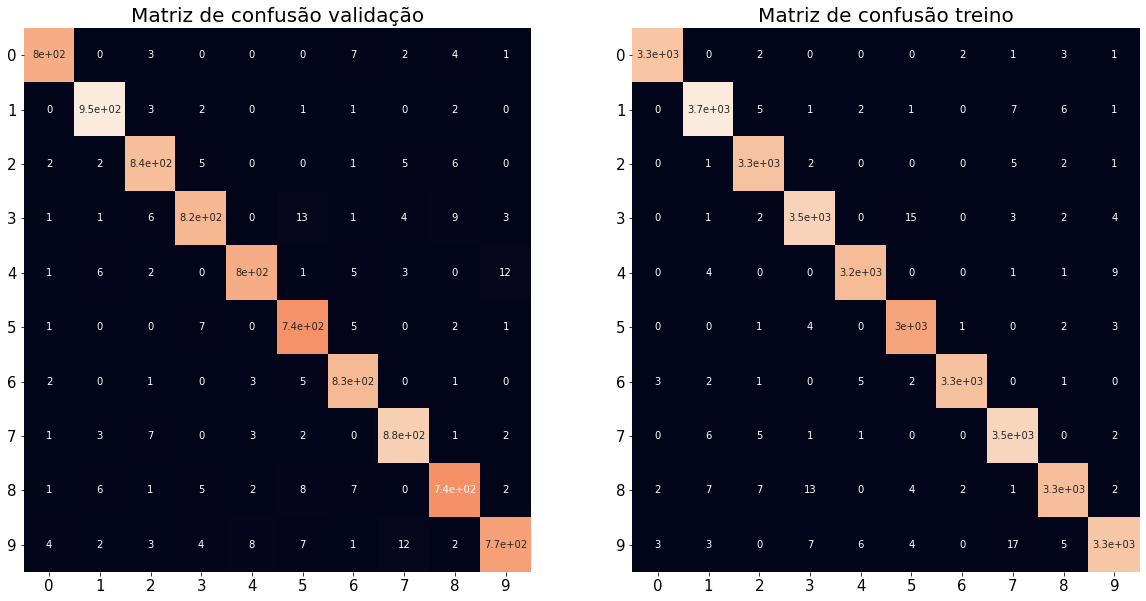

In [11]:
compare_confusion_matriz(m, X_treino, X_validacao, y_treino, y_validacao)

In [12]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 0.9938095238095238,
 'Acurácia da validação': 0.9717857142857143}

O modelo apresentou uma acurácia de 97% o que é um bom resultado. O programa confunde 9 com 4 (que é bastante lógico), 7 com 1 (também aceitável), 7 com 2, 7 com 9. Vamos avaliar os números que foram avaliados errado.

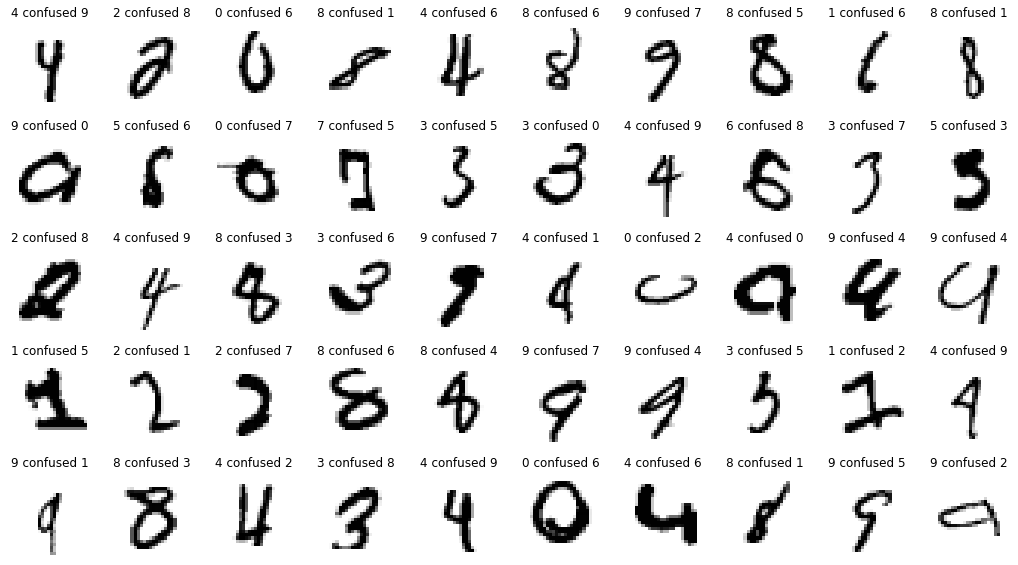

In [13]:
plot_erros(m, X_validacao, y_validacao)

É possível ver claramente o porque do programa confundir muitos desses números. O primeiro elemento eu chutaria que é um 8, segundo o gabarito é um 9 e o programa chutou 3, última linha há dois números que são praticamente iguais porem um é 9 e o outro 4. Porém alguns números são claros de identificar, logo o modelo pode ser melhorado.

## Otimização do modelo

### Número de neurônios na camada oculta

In [14]:
%%time 

neurons_list = [10, 20, 40, 100, 150, 200, 300, 400, 600, 1000]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(value, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 1s 3ms/step - loss: 1.2321 - accuracy: 0.6274 - val_loss: 0.6266 - val_accuracy: 0.8385
Epoch 2/20
168/168 [==============================] - 0s 3ms/step - loss: 0.5031 - accuracy: 0.8632 - val_loss: 0.4269 - val_accuracy: 0.8874
Epoch 3/20
168/168 [==============================] - 0s 3ms/step - loss: 0.3887 - accuracy: 0.8903 - val_loss: 0.3661 - val_accuracy: 0.9002
Epoch 4/20
168/168 [==============================] - 0s 3ms/step - loss: 0.3424 - accuracy: 0.9029 - val_loss: 0.3367 - val_accuracy: 0.9095
Epoch 5/20
168/168 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.9100 - val_loss: 0.3210 - val_accuracy: 0.9118
Epoch 6/20
168/168 [==============================] - 0s 3ms/step - loss: 0.3008 - accuracy: 0.9143 - val_loss: 0.3133 - val_accuracy: 0.9150
Epoch 7/20
168/168 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.9179 - val_loss: 0.2998 - val_accuracy: 0.9177
Epoch 

168/168 [==============================] - 1s 3ms/step - loss: 0.0755 - accuracy: 0.9787 - val_loss: 0.1382 - val_accuracy: 0.9586
Epoch 19/20
168/168 [==============================] - 1s 3ms/step - loss: 0.0725 - accuracy: 0.9798 - val_loss: 0.1383 - val_accuracy: 0.9613
Epoch 20/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9810 - val_loss: 0.1329 - val_accuracy: 0.9620
Epoch 1/20
168/168 [==============================] - 1s 4ms/step - loss: 0.5573 - accuracy: 0.8510 - val_loss: 0.2940 - val_accuracy: 0.9205
Epoch 2/20
168/168 [==============================] - 1s 4ms/step - loss: 0.2478 - accuracy: 0.9300 - val_loss: 0.2318 - val_accuracy: 0.9349
Epoch 3/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1931 - accuracy: 0.9451 - val_loss: 0.1959 - val_accuracy: 0.9480
Epoch 4/20
168/168 [==============================] - 1s 4ms/step - loss: 0.1596 - accuracy: 0.9553 - val_loss: 0.1772 - val_accuracy: 0.9508
Epoch 5/20
168/

168/168 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9966 - val_loss: 0.0937 - val_accuracy: 0.9751
Epoch 16/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0162 - accuracy: 0.9972 - val_loss: 0.0928 - val_accuracy: 0.9742
Epoch 17/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0136 - accuracy: 0.9982 - val_loss: 0.0919 - val_accuracy: 0.9762
Epoch 18/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0119 - accuracy: 0.9984 - val_loss: 0.0961 - val_accuracy: 0.9733
Epoch 19/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.9986 - val_loss: 0.0947 - val_accuracy: 0.9740
Epoch 20/20
168/168 [==============================] - 1s 4ms/step - loss: 0.0090 - accuracy: 0.9991 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 1/20
168/168 [==============================] - 1s 6ms/step - loss: 0.4356 - accuracy: 0.8799 - val_loss: 0.2386 - val_accuracy: 0.9340
Epoch 2/20
1

168/168 [==============================] - 1s 7ms/step - loss: 0.0090 - accuracy: 0.9987 - val_loss: 0.0861 - val_accuracy: 0.9782
Epoch 13/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0874 - val_accuracy: 0.9786
Epoch 14/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.0860 - val_accuracy: 0.9783
Epoch 15/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.0899 - val_accuracy: 0.9767
Epoch 16/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.9999 - val_loss: 0.0895 - val_accuracy: 0.9781
Epoch 17/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 0.9796
Epoch 18/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0913 - val_accuracy: 0.9792
Epoch 19/20

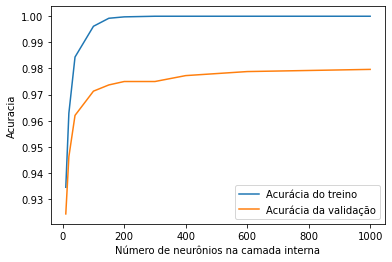

In [15]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na camada interna')
plt.ylabel('Acuracia')
plt.show()

Até 600 neurônios na camada interna há uma alteração significativa na acuracia do modelo.

### Adição de mais uma camada de neurônios

In [16]:
%%time 

neurons_list = [10, 20, 40, 100, 200]
acuracia_dict = dict()

for value in neurons_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(value, input_shape = (600,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)
    

Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 0.6988 - accuracy: 0.7852 - val_loss: 0.2678 - val_accuracy: 0.9279
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.2040 - accuracy: 0.9434 - val_loss: 0.1719 - val_accuracy: 0.9537
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1350 - accuracy: 0.9624 - val_loss: 0.1548 - val_accuracy: 0.9574
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1002 - accuracy: 0.9712 - val_loss: 0.1320 - val_accuracy: 0.9630
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0767 - accuracy: 0.9779 - val_loss: 0.1147 - val_accuracy: 0.9682
Epoch 6/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9839 - val_loss: 0.1184 - val_accuracy: 0.9656
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0440 - accuracy: 0.9883 - val_loss: 0.1027 - val_accuracy: 0.9698
Epoch 

168/168 [==============================] - 1s 7ms/step - loss: 6.8868e-04 - accuracy: 0.9999 - val_loss: 0.1024 - val_accuracy: 0.9798
Epoch 19/20
168/168 [==============================] - 1s 7ms/step - loss: 5.0335e-04 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9801
Epoch 20/20
168/168 [==============================] - 1s 7ms/step - loss: 4.1969e-04 - accuracy: 1.0000 - val_loss: 0.1034 - val_accuracy: 0.9795
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 0.3497 - accuracy: 0.9004 - val_loss: 0.1729 - val_accuracy: 0.9521
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1285 - accuracy: 0.9613 - val_loss: 0.1386 - val_accuracy: 0.9615
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0818 - accuracy: 0.9755 - val_loss: 0.1104 - val_accuracy: 0.9662
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0542 - accuracy: 0.9843 - val_loss: 0.0984 - val_accuracy: 0.9713
Epo

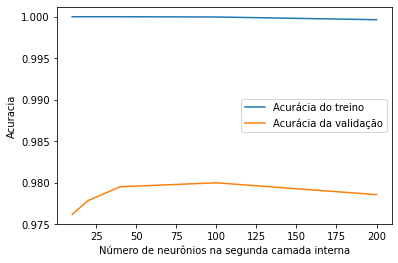

In [17]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Número de neurônios na segunda camada interna')
plt.ylabel('Acuracia')
plt.show()

A adição de mais uma camada de 25 neurônios melhorou um pouco o ajuste.

### Batch Size

In [18]:
%%time 

batch_size_list = [50, 70, 100, 200, 300, 400]
acuracia_dict = dict()

for value in batch_size_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation="relu"))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation="relu"))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = value, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[value] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
672/672 [==============================] - 3s 4ms/step - loss: 0.2846 - accuracy: 0.9161 - val_loss: 0.1438 - val_accuracy: 0.9598
Epoch 2/20
672/672 [==============================] - 3s 5ms/step - loss: 0.1065 - accuracy: 0.9666 - val_loss: 0.1280 - val_accuracy: 0.9618
Epoch 3/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 4/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.1047 - val_accuracy: 0.9680
Epoch 5/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0898 - val_accuracy: 0.9748
Epoch 6/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0918 - val_accuracy: 0.9765
Epoch 7/20
672/672 [==============================] - 3s 5ms/step - loss: 0.0237 - accuracy: 0.9919 - val_loss: 0.1002 - val_accuracy: 0.9755
Epoch 

336/336 [==============================] - 2s 6ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1045 - val_accuracy: 0.9792
Epoch 19/20
336/336 [==============================] - 2s 6ms/step - loss: 5.3955e-04 - accuracy: 0.9999 - val_loss: 0.1084 - val_accuracy: 0.9801
Epoch 20/20
336/336 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.1201 - val_accuracy: 0.9724
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 0.4099 - accuracy: 0.8863 - val_loss: 0.2072 - val_accuracy: 0.9435
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1619 - accuracy: 0.9538 - val_loss: 0.1474 - val_accuracy: 0.9594
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.1076 - accuracy: 0.9689 - val_loss: 0.1245 - val_accuracy: 0.9649
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0800 - accuracy: 0.9761 - val_loss: 0.1116 - val_accuracy: 0.9679
Epoch 5/20


84/84 [==============================] - 1s 10ms/step - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0906 - val_accuracy: 0.9771
Epoch 16/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0057 - accuracy: 0.9996 - val_loss: 0.0915 - val_accuracy: 0.9777
Epoch 17/20
84/84 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 0.9998 - val_loss: 0.0936 - val_accuracy: 0.9779
Epoch 18/20
84/84 [==============================] - 1s 11ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.0928 - val_accuracy: 0.9779
Epoch 19/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0942 - val_accuracy: 0.9780
Epoch 20/20
84/84 [==============================] - 1s 10ms/step - loss: 0.0027 - accuracy: 0.9999 - val_loss: 0.0986 - val_accuracy: 0.9779
CPU times: user 8min 13s, sys: 39.5 s, total: 8min 53s
Wall time: 3min 40s


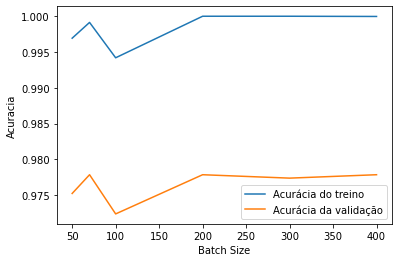

In [19]:
pd.DataFrame(acuracia_dict).T.plot()
plt.xlabel('Batch Size')
plt.ylabel('Acuracia')
plt.show()

Parece que o batch size de 200 otimizar o tempo e possui um bom resultado (em 75 parece ter um pico mas ele é um efeito da aleatóriedade do modelo)

### Funções de ativação

In [20]:
activation_list = ['relu', 'selu', 'tanh', 'sigmoid']
acuracia_dict = dict()

for activation in activation_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation=activation))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation=activation))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[activation] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 2s 9ms/step - loss: 0.4188 - accuracy: 0.8824 - val_loss: 0.2161 - val_accuracy: 0.9393
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1527 - accuracy: 0.9556 - val_loss: 0.1418 - val_accuracy: 0.9585
Epoch 3/20
168/168 [==============================] - 1s 9ms/step - loss: 0.1018 - accuracy: 0.9701 - val_loss: 0.1198 - val_accuracy: 0.9669
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0737 - accuracy: 0.9782 - val_loss: 0.1126 - val_accuracy: 0.9680
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0564 - accuracy: 0.9835 - val_loss: 0.1059 - val_accuracy: 0.9702
Epoch 6/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.1050 - val_accuracy: 0.9713
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0297 - accuracy: 0.9919 - val_loss: 0.0933 - val_accuracy: 0.9750
Epoch 

168/168 [==============================] - 1s 7ms/step - loss: 0.0079 - accuracy: 0.9990 - val_loss: 0.0941 - val_accuracy: 0.9733
Epoch 19/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.1045 - val_accuracy: 0.9705
Epoch 20/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 0.0987 - val_accuracy: 0.9726
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 1.2096 - accuracy: 0.7583 - val_loss: 0.7048 - val_accuracy: 0.8801
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 0.5461 - accuracy: 0.8940 - val_loss: 0.4310 - val_accuracy: 0.9104
Epoch 3/20
168/168 [==============================] - 1s 7ms/step - loss: 0.3696 - accuracy: 0.9171 - val_loss: 0.3260 - val_accuracy: 0.9238
Epoch 4/20
168/168 [==============================] - 2s 10ms/step - loss: 0.2860 - accuracy: 0.9307 - val_loss: 0.2682 - val_accuracy: 0.9331
Epoch 5/20
168

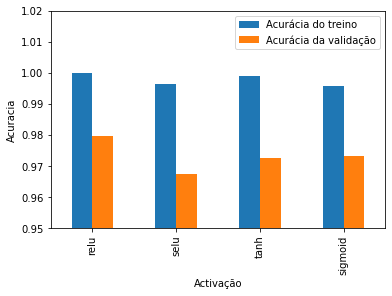

In [21]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Activação')
plt.ylabel('Acuracia')
plt.ylim(0.95, 1.02)
plt.show()

A melhor função de ativação foi relu

### Optimizer

In [22]:
optimizer_list = ['SGD', 'RMSprop', 'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl']
acuracia_dict = dict()

for optimizer in optimizer_list:
    m = keras.models.Sequential()

    m.add(keras.layers.Dense(600, input_shape = (784,), activation='relu'))
    m.add(keras.layers.Dense(25, input_shape = (600,), activation='relu'))
    m.add(keras.layers.Dense(10, activation="softmax"))

    m.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    H = m.fit(X_treino, y_treino, 
              batch_size = 200, epochs = 20, 
              validation_data = (X_validacao, y_validacao));

    acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 1.8353 - accuracy: 0.4266 - val_loss: 1.3601 - val_accuracy: 0.6323
Epoch 2/20
168/168 [==============================] - 1s 7ms/step - loss: 1.0363 - accuracy: 0.7568 - val_loss: 0.7997 - val_accuracy: 0.8255
Epoch 3/20
168/168 [==============================] - 1s 6ms/step - loss: 0.6795 - accuracy: 0.8422 - val_loss: 0.5848 - val_accuracy: 0.8624
Epoch 4/20
168/168 [==============================] - 1s 7ms/step - loss: 0.5312 - accuracy: 0.8666 - val_loss: 0.4840 - val_accuracy: 0.8801
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.4550 - accuracy: 0.8808 - val_loss: 0.4296 - val_accuracy: 0.8910
Epoch 6/20
168/168 [==============================] - 1s 6ms/step - loss: 0.4091 - accuracy: 0.8894 - val_loss: 0.3936 - val_accuracy: 0.8993
Epoch 7/20
168/168 [==============================] - 1s 6ms/step - loss: 0.3778 - accuracy: 0.8963 - val_loss: 0.3681 - val_accuracy: 0.9039
Epoch 

168/168 [==============================] - 1s 7ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.1103 - val_accuracy: 0.9785
Epoch 19/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.1067 - val_accuracy: 0.9776
Epoch 20/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9785
Epoch 1/20
168/168 [==============================] - 1s 8ms/step - loss: 2.3258 - accuracy: 0.1124 - val_loss: 2.2992 - val_accuracy: 0.1351
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 2.2720 - accuracy: 0.1577 - val_loss: 2.2473 - val_accuracy: 0.1811
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 2.2209 - accuracy: 0.2052 - val_loss: 2.1967 - val_accuracy: 0.2308
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 2.1704 - accuracy: 0.2511 - val_loss: 2.1461 - val_accuracy: 0.2787
Epoch 5/20
168/

168/168 [==============================] - 1s 7ms/step - loss: 0.0291 - accuracy: 0.9934 - val_loss: 0.0964 - val_accuracy: 0.9725
Epoch 16/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0252 - accuracy: 0.9950 - val_loss: 0.0957 - val_accuracy: 0.9727
Epoch 17/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0225 - accuracy: 0.9954 - val_loss: 0.0907 - val_accuracy: 0.9754
Epoch 18/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0191 - accuracy: 0.9968 - val_loss: 0.0925 - val_accuracy: 0.9745
Epoch 19/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0170 - accuracy: 0.9971 - val_loss: 0.0935 - val_accuracy: 0.9751
Epoch 20/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0146 - accuracy: 0.9979 - val_loss: 0.0927 - val_accuracy: 0.9740
Epoch 1/20
168/168 [==============================] - 2s 10ms/step - loss: 0.4463 - accuracy: 0.8779 - val_loss: 0.2094 - val_accuracy: 0.9402
Epoch 2/20


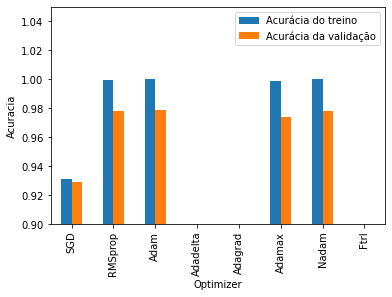

In [23]:
pd.DataFrame(acuracia_dict).T.plot.bar()
plt.xlabel('Optimizer')
plt.ylabel('Acuracia')
plt.ylim(0.90, 1.05)
plt.show()

As otimizações RMSprop, Adam, Adamax e Nadam apresentaram o mesmo resultado.

In [33]:
m = keras.models.Sequential()

m.add(keras.layers.Dense(600, input_shape = (784,), activation='relu'))
m.add(keras.layers.Dense(25, input_shape = (600,), activation='relu'))
m.add(keras.layers.Dense(10, activation="softmax"))

m.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

H = m.fit(X_treino, y_treino, 
          batch_size = 200, epochs = 20, 
          validation_data = (X_validacao, y_validacao));

acuracia_dict[optimizer] = acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

Epoch 1/20
168/168 [==============================] - 2s 9ms/step - loss: 0.4431 - accuracy: 0.8737 - val_loss: 0.2126 - val_accuracy: 0.9425
Epoch 2/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1537 - accuracy: 0.9557 - val_loss: 0.1490 - val_accuracy: 0.9563
Epoch 3/20
168/168 [==============================] - 1s 8ms/step - loss: 0.1060 - accuracy: 0.9683 - val_loss: 0.1217 - val_accuracy: 0.9662
Epoch 4/20
168/168 [==============================] - 1s 8ms/step - loss: 0.0729 - accuracy: 0.9779 - val_loss: 0.1150 - val_accuracy: 0.9667
Epoch 5/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.1024 - val_accuracy: 0.9714
Epoch 6/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0397 - accuracy: 0.9893 - val_loss: 0.1063 - val_accuracy: 0.9693
Epoch 7/20
168/168 [==============================] - 1s 7ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.0936 - val_accuracy: 0.9746
Epoch 

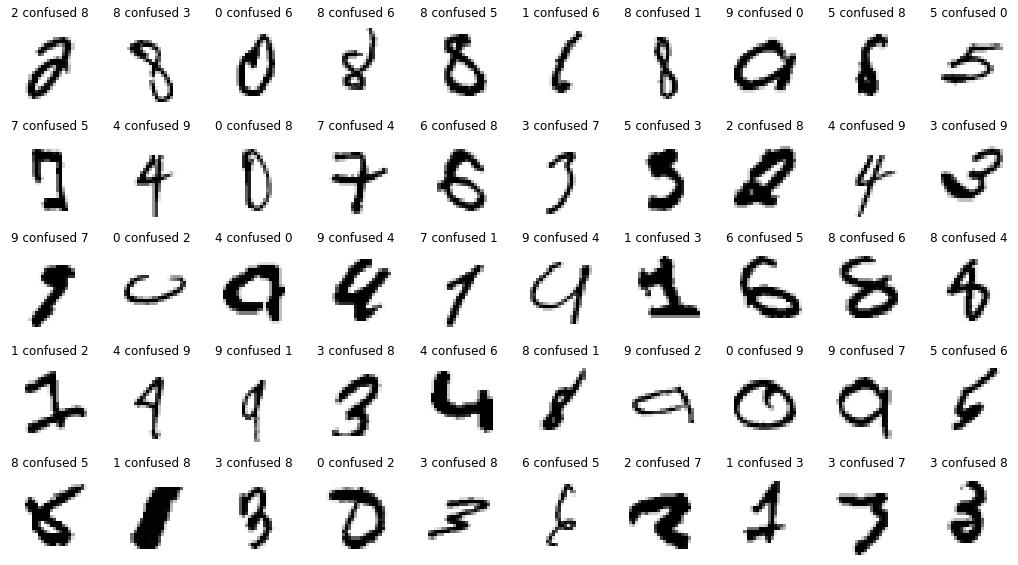

In [34]:
plot_erros(m, X_validacao, y_validacao)

In [35]:
y_pred = m.predict(X_validacao)
y_pred = np.argmax(y_pred, axis=1)

predicao = pd.DataFrame(data={'predicao':y_pred, 'target':y_validacao})
predicao_erros = predicao[predicao.predicao != predicao.target]

predicao_erros

,predicao,target
67,8,2
232,3,8
416,6,0
439,6,8
509,5,8
...,...,...
8133,1,4
8159,8,4
8169,7,9
8278,8,1


In [36]:
acuracia(m, X_treino, X_validacao, y_treino, y_validacao)

{'Acurácia do treino': 1.0, 'Acurácia da validação': 0.978452380952381}

O modelo conseguiu alcançar 98% de taxa de acerto. Existem ainda pontos onde pode ser melhorados, vendo as imagens que ele falhou a reconhecer é possível perceber claramente porque ele tem tanta dificuldade em localizar os padrões.